<a href="https://colab.research.google.com/github/gaurinotgauri/gaurinotgauri/blob/main/Toxic_Comments_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and Visualizing Data

In [2]:
#Mounting Google drive to access dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import os
import string
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
import wordcloud
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [4]:
# Check if running in a Colab environment
if 'COLAB_TPU_ADDR' in os.environ:
    # Set up TPU cluster resolver
    tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu=tpu_address)
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)

    # Create a distribution strategy for TPUs
    strategy = tf.distribute.TPUStrategy(resolver)

    print("Connected to TPU.")
else:
    print("Not running in a Colab environment or TPU not available.")

Connected to TPU.


In [5]:
df=pd.read_csv('/content/gdrive/MyDrive/jigsaw-toxic-comment-classification-challenge/train.csv')

In [6]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [7]:
df.shape

(159571, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [9]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [11]:
columns_to_count = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for column in columns_to_count:
    print(df[column].value_counts())
    print("\n")

0    144277
1     15294
Name: toxic, dtype: int64


0    157976
1      1595
Name: severe_toxic, dtype: int64


0    151122
1      8449
Name: obscene, dtype: int64


0    159093
1       478
Name: threat, dtype: int64


0    151694
1      7877
Name: insult, dtype: int64


0    158166
1      1405
Name: identity_hate, dtype: int64




In [12]:
columns_to_count = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df['non_toxic'] = 0
df.loc[(df[columns_to_count] == 0).all(axis=1), 'non_toxic'] = 1

In [13]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,1
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,1
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,1
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,1


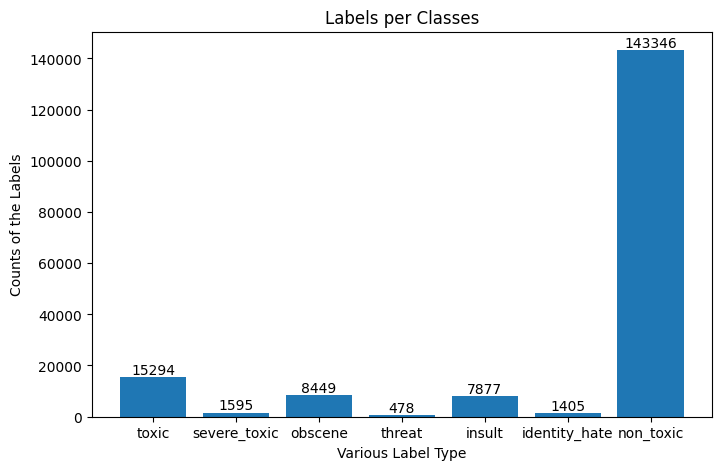

In [14]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic']
val_counts = df[labels].sum()

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(val_counts.index, val_counts.values)

# Add annotations to the bars
for i, v in enumerate(val_counts.values):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.title("Labels per Classes")
plt.xlabel("Various Label Type")
plt.ylabel("Counts of the Labels")
plt.show()


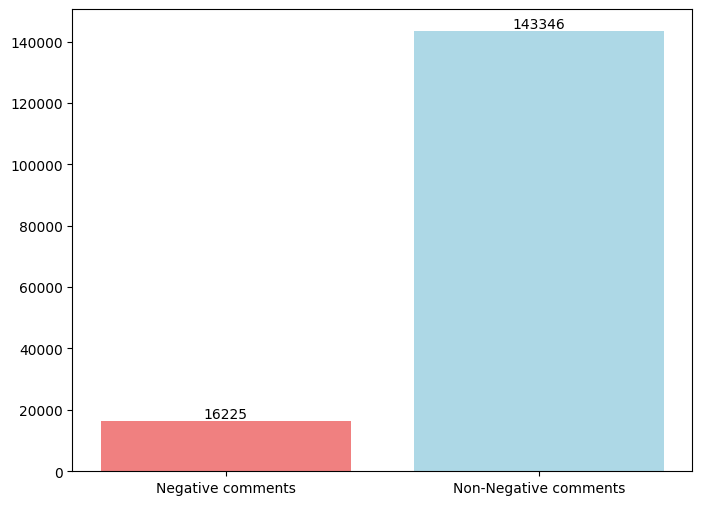

In [15]:
toxic_columns = ['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Total number of rows
total_rows = len(df)

# Count of rows where 'non_toxic' is 1
non_toxic_rows = (df['non_toxic'] == 1).sum()

# Calculate Bin 1 counts
bin1_counts = total_rows - non_toxic_rows

# Sum of value counts for Bin 2 ('non_toxic' column)
bin2_counts = non_toxic_rows
# Pastel colors for the bins
bin_colors = ['lightcoral', 'lightblue']

# Plotting with pastel colors
fig, ax = plt.subplots(figsize=(8, 6))
x = ['Negative comments', 'Non-Negative comments']
y = [bin1_counts, bin2_counts]
bars = ax.bar(x, y, color=bin_colors)

# Add annotations to the bars
for i, v in enumerate(y):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()


In [16]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1


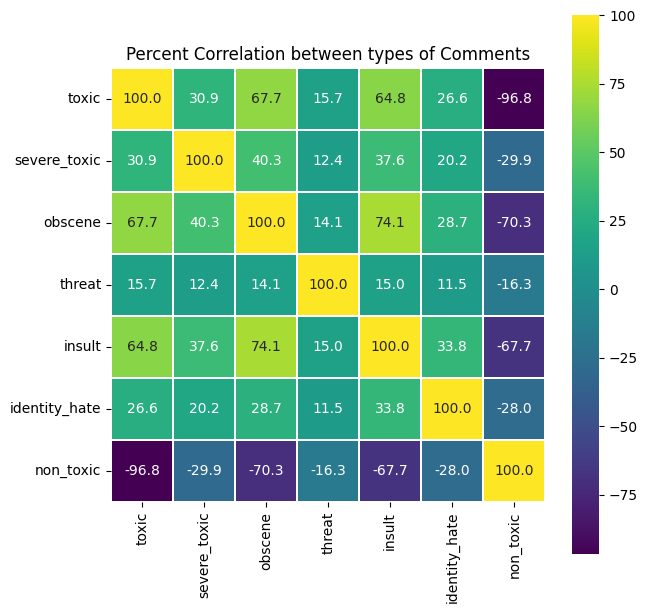

In [17]:
data = df[labels]
colormap = plt.cm.viridis
plt.figure(figsize=(7, 7))
plt.title('Percent Correlation between types of Comments', y=1, size=12)
# Display correlation values as percentages with one decimal place
sns.heatmap(data.astype(float).corr() * 100, linewidths=0.1, vmax=100, square=True, cmap=colormap, linecolor='white', annot=True, fmt=".1f")
plt.show()


In [18]:
# Making DataFrames of each type of comments fro visualization
toxic=df[df['toxic'] == 1].loc[:,['id','comment_text','toxic']]
severe_toxic=df[df['severe_toxic'] == 1].loc[:,['id','comment_text','severe_toxic']]
obscene=df[df['obscene'] == 1].loc[:,['id','comment_text','obscene']]
threat=df[df['threat'] == 1].loc[:,['id','comment_text','threat']]
insult=df[df['insult'] == 1].loc[:,['id','comment_text','insult']]
identity_hate=df[df['identity_hate'] == 1].loc[:,['id','comment_text','identity_hate']]

In [19]:
threat.head()

,id,comment_text,threat
79,003217c3eb469ba9,Hi! I am back again!\nLast warning!\nStop undo...,1
176,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1
600,0199d6af27b715f3,I'm also a sock puppet of this account...SUPRI...,1
802,02230885017a50c5,"Fuck you, Smith. Please have me notified when ...",1
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1


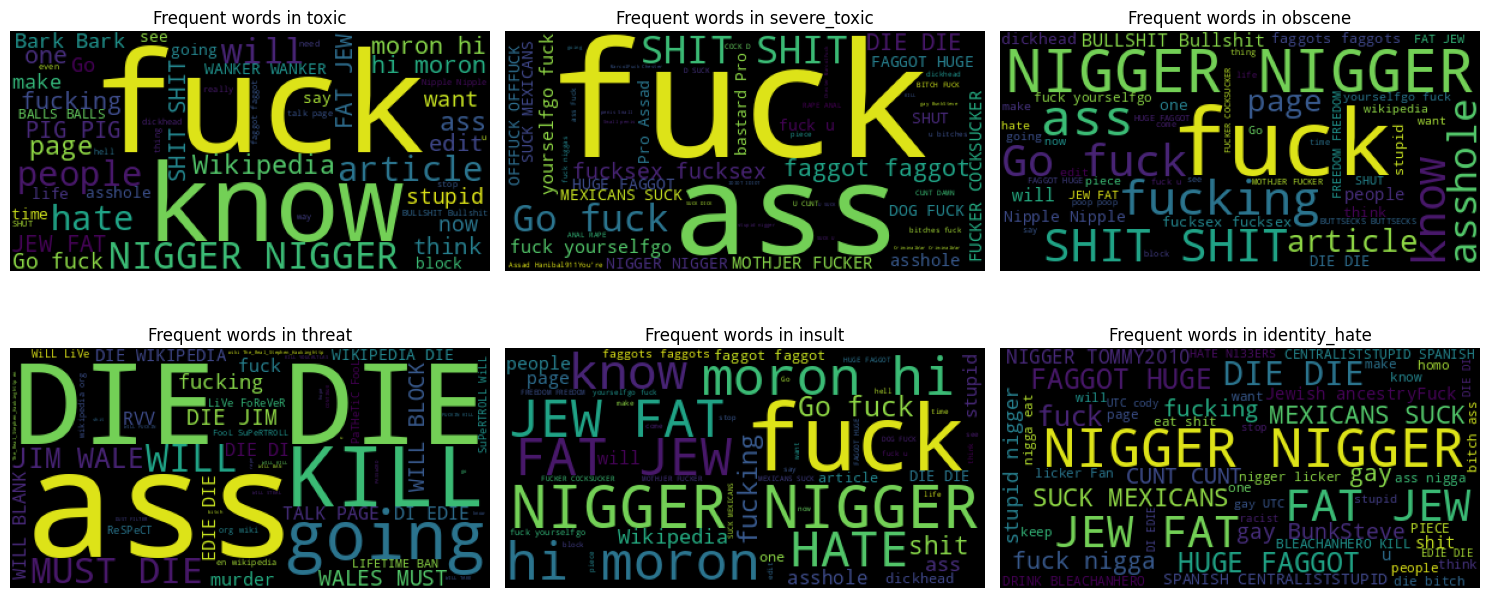

In [20]:
# Visualizing most frequent words in each type of comment
def wordcloud(df, label, position):
    text = df.comment_text.values
    wc = WordCloud(background_color="black", max_words=50)
    wc.generate(" ".join(text))

    plt.subplot(position)
    plt.axis("off")
    plt.title("Frequent words in {}".format(label), fontsize=12)
    plt.imshow(wc.recolor(colormap='viridis', random_state=244))
plt.figure(figsize=(15,7))

wordcloud(toxic, 'toxic', 231)
wordcloud(severe_toxic, 'severe_toxic', 232)
wordcloud(obscene, 'obscene', 233)
wordcloud(threat, 'threat', 234)
wordcloud(insult, 'insult', 235)
wordcloud(identity_hate, 'identity_hate', 236)

plt.tight_layout()
plt.show()


# Preprocessing

In [21]:
# Dropping the non_toxic column as we don't need it for training
df=df.drop('non_toxic', axis=1)

In [22]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [23]:
df[df.columns[:2]].head()

,id,comment_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember..."


In [24]:
#Splitting Features and Labels
X = df['comment_text']
y = df[df.columns[2:]].values

In [25]:
X.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [26]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [27]:
#Total words in all comments
df['comment_text'].apply(lambda x: len(str(x).split(' '))).sum()


10829599

In [28]:
total_unique_word_count = df['comment_text'].str.lower().str.split().explode().nunique()
total_unique_word_count

470340

In [29]:
#Longest comment
df['comment_text'].max()

"\ufeffSensual Pleasures of the MindItalic text\n\nThere are endless creative ways to provoke and capture sensual feelings. Money can’t buy it, you can’t see it or hold it, outer\npackaging offers no competition for it and no grandiose flash of materialistic presence can incite it. Sensuality in it’s truest sense can only be felt within.  It is provoked by and through the power and brilliance of the mind. It is born there and lives there.\n\nSince it is a feeling rather than a physical event, it is more difficult to achieve and maintain than might be found with other less deeply rooted sexual experiences.  Knowledge, intuition and creativity are the tools necessary to discover where it lives and how to awaken it, what it takes to stimulate it and how to nurture it so it will grow. A conscientious partner can create a need and cravings simply by using the power of the mind.    \n\nAll of this offers new meaning to the old adage about the mind being a terrible thing to waste. There are h

In [30]:
max_sentence_length = df['comment_text'].apply(lambda x: len(str(x).split())).max()
max_sentence_length

1411

In [31]:
max_features = 500000  #Defining the maximum number of unique words to keep
max_len = 1500  #Defining the maximum length for padding/ truncating sequences

#Map every word to an integer value
vectorizer = TextVectorization(max_tokens = max_features, output_sequence_length = max_len, output_mode = 'int')


In [32]:
#To analyze the text data, tokenize it, and build vocabulary
vectorizer.adapt(X.values)

In [33]:
vectorized_text = vectorizer(X.values)
vectorized_text

<tf.Tensor: shape=(159571, 1500), dtype=int64, numpy=
array([[   645,     76,      2, ...,      0,      0,      0],
       [219427,     54,   2489, ...,      0,      0,      0],
       [   425,    441,     70, ...,      0,      0,      0],
       ...,
       [ 32445,   7392,    383, ...,      0,      0,      0],
       [     5,     12,    534, ...,      0,      0,      0],
       [     5,      8,    130, ...,      0,      0,      0]])>

In [34]:
# MCSHBAP (map, cache, shuffle, batch, prefetch) for efficient and optimized handling of input data

dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)  #Buffer size
dataset = dataset.batch(256)       #Each batch represented as a series of 256 samples
dataset = dataset.prefetch(16)     #To prevent bottlenecks

In [35]:
a_batch = dataset.as_numpy_iterator().next()    # batch of 256 training example
a_batch

(array([[    2, 23915,   197, ...,     0,     0,     0],
        [    8,    19,     6, ...,     0,     0,     0],
        [ 1161, 74462, 38975, ...,     0,     0,     0],
        ...,
        [  208,     8,   105, ...,     0,     0,     0],
        [  136,   456,    29, ...,     0,     0,     0],
        [62969,   405,    34, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [36]:
#Checking length
len(a_batch[0])

256

In [37]:
no_of_batches=len(dataset)
no_of_batches

624

In [38]:
# Splitting training, test and validation set
train = dataset.take(int(len(dataset)*.9))   # 90%
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.05))   # 5%
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.05))  # 5%

In [39]:
len(train), len(val), len(test)

(561, 31, 31)

# Modelling


In [40]:
with strategy.scope(): #To utilize TPU processing
  model = Sequential()
  # embedding layer for nlp
  model.add(Embedding(max_features+1, 32)) #Each word is represented as a vector with 32 components
  model.add(Bidirectional(LSTM(32, activation='tanh'))) # Bidirectional LSTM Layer
  # Fully connected layers for feature extraction and representation
  model.add(Dense(128, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5)) #To reduce overfitting
  model.add(Dense(6, activation='sigmoid')) #Layer for classification
  model.compile(optimizer='Adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          16000032  
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

# Training the model


In [42]:
#Training the model with Bidirectional LSTM for Text Classification
hist = model.fit(train, epochs=3, validation_data=val, verbose=1)

Epoch 1/3
561/561 [==============================] - 329s 566ms/step - loss: 0.0911 - accuracy: 0.8113 - val_loss: 0.0476 - val_accuracy: 0.9934
Epoch 2/3
561/561 [==============================] - 313s 558ms/step - loss: 0.0496 - accuracy: 0.9802 - val_loss: 0.0389 - val_accuracy: 0.9927
Epoch 3/3
561/561 [==============================] - 313s 558ms/step - loss: 0.0422 - accuracy: 0.9886 - val_loss: 0.0372 - val_accuracy: 0.9936


In [49]:
l,a= model.evaluate(test)
print('Test Loss: ', l)
print('Test Accuracy: ', a)


31/31 [==============================] - 5s 67ms/step - loss: 0.0373 - accuracy: 0.9958
Test Loss:  0.037348464131355286
Test Accuracy:  0.9958417415618896


<Figure size 800x500 with 0 Axes>

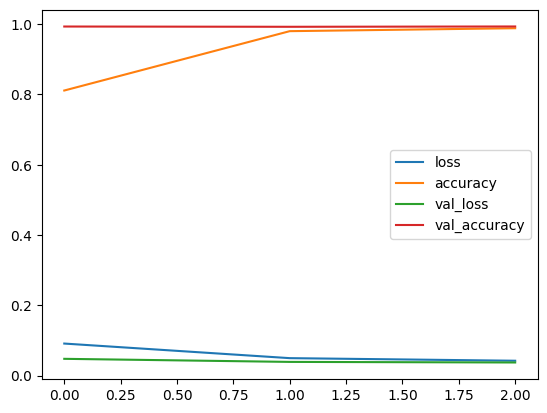

In [50]:
# Trend of loss and accuracy during training
plt.figure(figsize=(8,5))
pd.DataFrame(hist.history).plot()
plt.show()

# Prediction

In [66]:
input_text = vectorizer('Who do you think you are, sucker ? I will beat you.')
res = model.predict(np.expand_dims(input_text, axis=0))
print(toxic_columns)
print(res)

1/1 [==============================] - 1s 826ms/step
['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
[[0.96206445 0.01712039 0.57887495 0.01914492 0.49075907 0.05752861]]


In [68]:
#Classification of the comment
print(toxic_columns)
(res > 0.4).astype(int)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


array([[1, 0, 1, 0, 1, 0]])

In [80]:
pre = Precision()
re = Recall()
for batch in test.as_numpy_iterator():
    X_test, y_test = batch
    y_pred = model.predict(X_test)

    y_test = y_test.flatten()
    y_pred = y_pred.flatten()

    pre.update_state(y_test, y_pred)
    re.update_state(y_test, y_pred)

8/8 [==============================] - 1s 49ms/step


Exception ignored in: <function Executor.__del__ at 0x7c930de5ed40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


In [81]:
print(f'Precision: {precision}, Recall: {recall}')

Precision: 0.8668596148490906, Recall: 0.7282674908638
